In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/

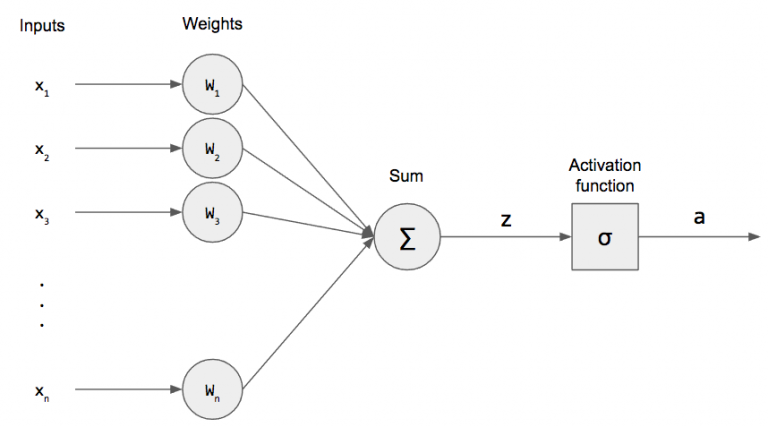

Activation - Heaviside step function
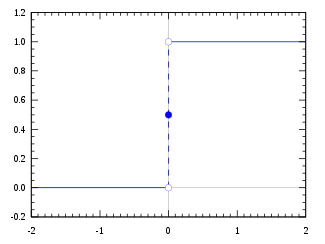

AND/OR are linearly separable. So we can use single line (decision boundary) to separate the samples of both classes. XOR - NOT linearly separable. Cannot draw a single line to separate them. 
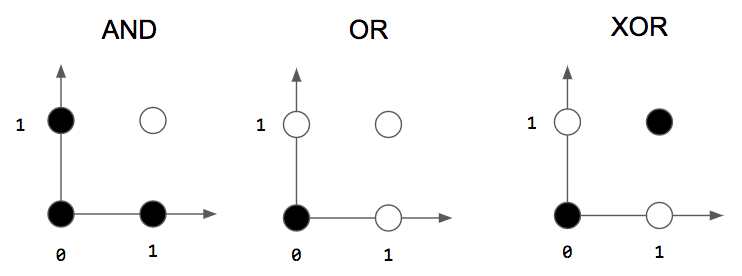

But we can apply the activation function multiple times and achieve this

In [2]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

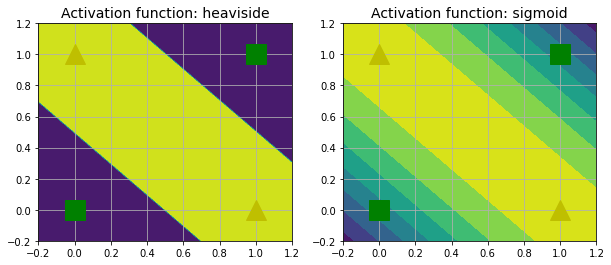

In [3]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [5]:
iris = load_iris()

In [6]:
X = iris.data[:, (1, 2)]
y = np.where(iris.target == 0, 1, 0)

In [7]:
X[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

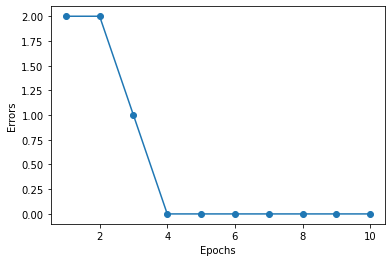

In [9]:
p = Perceptron(0.1, 10)
p.fit(X, y)
plt.plot(range(1, len(p.errors_)+1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

In [10]:
y_hat = p.predict(X)

In [11]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
accuracy_score(y, y_hat)

1.0

In [13]:
digits = load_digits()
X = digits.data
y = np.where(digits.target == 8, 1, 0)

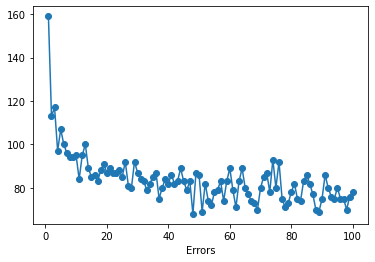

In [14]:
p = Perceptron(0.1, 100)
p.fit(X, y)
plt.plot(range(1, len(p.errors_)+1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.xlabel('Errors')
plt.show()

In [15]:
y_hat = p.predict(X)
accuracy_score(y, y_hat)

0.9616026711185309

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [16]:
from sklearn.linear_model import Perceptron

In [17]:
p = Perceptron(eta0 = 0.1, max_iter = 100)
p.fit(X, y)
y_hat = p.predict(X)
accuracy_score(y, y_hat)

0.9660545353366722